# HR Dataset - Statistics Review

## Explore the data

The data set we will use for this exercise comes from a Kaggle challenge and is often used for predictive analytics, namely to predict why the best and most experienced employees tend to leave the company.  We won't be using it for any predictive purposes here, but will instead use this data set to review many of the concepts explored in the Statistical Inference lectures.

This data contains fields for various measures of employee performance and reported satisfaction levels, as well as categorical variables for events and salary level.  For now, just explore the data a bit to get a general idea of what is going on.

In [68]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import random

% matplotlib inline

In [3]:
# Load data into a dataframe
data = pd.read_csv('HR_comma_sep.csv')

In [10]:
# Simple exploration
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [7]:
data.describe(include=['O']).T

,count,unique,top,freq
sales,14999,10,sales,4140
salary,14999,3,low,7316


In [11]:
# Rename two columns to fix typo, convert to lowercase
data.rename(columns={'average_montly_hours': 'average_monthly_hours',
                     'Work_accident': 'work_accident'}, inplace=True)
data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Probability, Expectation Values, and Variance

The concepts of probability, expectation values, and variance are the bedrock of statistical inference.  Let's begin by employing some of these concepts to see if we can find some interesting paths to go down which may provide some insight into the inner workings of this company.

1. What is the probability that a randomly selected employee left the company?  What about experienced a work accident?  Also compute the probability that a randomly selected employee left the company and experienced a work accident.
1. Compute the 25th, 50th, and 90th percentiles for the satisfaction level score for all employees that left the company.  Compare these results to the same percentiles for those that did not leave.  What can you say about the results?
1. Compute the variance and standard deviation of hours worked.
1. Compare the variance between the satisfaction levels of employees who left versus those who stayed.  Which is larger?  What does this mean?
1. Compute the mean satisfaction level for each salary category.  Comment on your results.
1. Given an employees salary level (low, medium, or high), calculate the probability that they worked more than two standard deviations of the average monthly hours across all groups.  In other words, compute
$$P(hours > 2\sigma \vert salary ) = \dfrac{P(salary \vert hours > 2\sigma) P(hours > 2\sigma)}{P(salary)}$$
1. What can you say about your results in part 6?
1. Repeat parts 6 and 7 for 
$$P(left \vert salary ) = \dfrac{P(salary \vert left) P(left)}{P(salary)}$$
1. What is the odds ratio of an employee with a high salary getting a promotion within the past five years versus a low salary employee?  Comment on your results.
1. Suppose we were to pull a random sample of size 50 of employee satisfaction levels.  What would approximately be the mean of this sample?  What would be the mean of, say, 10 sets of random samples?  Demonstrate your assertions by writing some python code to do just that.


In [26]:
# Question 1
# Get total number of employees that left, find proportion of total
left_count = data.left.value_counts()[1]
prob_left = left_count / len(data.left)

# Get total number of employees who experienced an accident, find proportion of total
accident_count = data.work_accident.value_counts()[1]
prob_accident = accident_count / len(data.work_accident)

# Get total number of employees who left and had an accident, find proportion of total
left_accident_count = len(data[(data.left == 1) & (data.work_accident == 1)])
prob_left_accident = left_accident_count / len(data.left)

print('Probability of selecting an employee that left: %0.2f%%' % (prob_left*100))
print('Probability of selecting an employee that had an accident: %0.2f%%' % (prob_accident*100))
print('Probability of selecting an employee that left and had an accident: %0.2f%%' % (prob_left_accident*100))

Probability of selecting an employee that left: 23.81%
Probability of selecting an employee that had an accident: 14.46%
Probability of selecting an employee that left and had an accident: 1.13%


In [30]:
# Question 2
# Get dataframes for those who stayed and left
left_df = data[data.left == 1]
stay_df = data[data.left == 0]

l1, l2, l3 = left_df.satisfaction_level.quantile(q=[0.25, 0.5, 0.9])
s1, s2, s3 = stay_df.satisfaction_level.quantile(q=[0.25, 0.5, 0.9])

print('Satisfaction levels for 25th, 50th, and 90th percentile for employees who left:')
print('{}, {}, {}'.format(l1, l2, l3))
print('Satisfaction levels for 25th, 50th, and 90th percentile for employees who stayed:')
print('{}, {}, {}'.format(s1, s2, s3))


Satisfaction levels for 25th, 50th, and 90th percentile for employees who left:
0.13, 0.41, 0.84
Satisfaction levels for 25th, 50th, and 90th percentile for employees who stayed:
0.54, 0.69, 0.94


In [35]:
# Alternative solution using groupby
data.groupby('left').satisfaction_level.quantile(q=[0.25, 0.5, 0.9]).unstack()

,0.25,0.5,0.9
left,,,
0,0.54,0.69,0.94
1,0.13,0.41,0.84


In [45]:
# Question 3
var_hours_worked = data['average_monthly_hours'].var()
std_hours_worked = data['average_monthly_hours'].std()
mean_hours_worked = data['average_monthly_hours'].mean()

print('Variance of hours worked: {0:.2f}'.format(var_hours_worked))
print('Standard deviation of hours worked: {0:.2f}'.format(std_hours_worked))

Variance of hours worked: 2494.31
Standard deviation of hours worked: 49.94


In [36]:
# Alternative
data.average_monthly_hours.agg(['var', 'std'])

var    2494.313175
std      49.943099
Name: average_monthly_hours, dtype: float64

In [44]:
# Question 4
data.groupby('left').satisfaction_level.var()

left
0    0.047134
1    0.069661
Name: satisfaction_level, dtype: float64

In [43]:
# Question 5
data.groupby('salary').satisfaction_level.mean()

salary
high      0.637470
low       0.600753
medium    0.621817
Name: satisfaction_level, dtype: float64

In [47]:
# Question 6
ave_hours_plus2std = mean_hours_worked + (2 * std_hours_worked)

# Compute the components of Bayes theorem
N = len(data)

# P(hours > ave hours plus2)
p_hours = len(data[data.average_monthly_hours > ave_hours_plus2std]) / N

# P(salary), just proportions of each salary type in data
p_salary = data.salary.value_counts() / N

# P(salary | hours > ave hours plus2)
# The number of each salary type that works > ave hours plus2
# divided by the total number of workers who work > ave hours plus2
p_salary_hours = (data[data.average_monthly_hours > ave_hours_plus2std].salary.value_counts() /
                     len(data[data.average_monthly_hours > ave_hours_plus2std]))

# Finally use Bayes Theorem
p_hours_salary = (p_salary_hours * p_hours) / p_salary

In [48]:
p_hours_salary

low       0.013532
medium    0.008998
high      0.001617
Name: salary, dtype: float64

In [49]:
# Question 7
p_hours

0.01060070671378092

In [50]:
p_salary

low       0.487766
medium    0.429762
high      0.082472
Name: salary, dtype: float64

In [52]:
p_salary_hours

low       0.622642
medium    0.364780
high      0.012579
Name: salary, dtype: float64

In [57]:
# Question 8
# Find P(left | salary)
p_left = prob_left

# Need P(salary | left) to apply Bayes Theorem
p_salary_left = data[data.left == 1].salary.value_counts() / len(data[data.left == 1])

# Apply Bayes theorem
p_left_salary = (p_salary_left * p_left) / p_salary

In [58]:
p_left_salary

low       0.296884
medium    0.204313
high      0.066289
Name: salary, dtype: float64

In [59]:
p_salary_left

low       0.608233
medium    0.368804
high      0.022963
Name: salary, dtype: float64

In [66]:
# Question 9
N = data.salary.value_counts()

# Proportion of employees promoted and not promoted by salary type
got_p = data[data.promotion_last_5years == 1].salary.value_counts() / N
not_p = data[data.promotion_last_5years == 0].salary.value_counts() / N

# Compute odds for high and low respectively then the ratio of the two
odds = (got_p['high'] / not_p['high']) / (got_p['low'] / not_p['low'])
odds

6.788919235271166

In [77]:
# Question 10
sample = np.random.choice(a=data.satisfaction_level, size=50)
samples = [data.sample(50).satisfaction_level.mean() for _ in range(10)]
samples_arr = np.array(samples)
samples_arr.mean()

0.6216

In [78]:
data.satisfaction_level.mean()

0.6128335222348166

## Distributions and The Central Limit Theorem
### The Bernoulli Distribution
Bernoulli distributions are the result of a random variable with a binary outcome, like a coin flip or medical test giving a positive or negative result.  Typically we represent the outcomes of a Bernoulli Random variable $X$ of only taking values of 0 or 1, with probabilities $p$ and $1 - p$ respectively, mean $p$, variance $p(1 - p)$, and PMF given by

$$ P(X = x) = p^x (1 - p)^{1 - x} $$

Where $x$ is the outcome and $p$ is the probability of the positive outcome (1).

Bernoulli random variables crop up very often in statistical analysis &mdash; most often in the form of Binomial trials, or, as a sum of independent Bernoulli variables with PMF given by 
$$ P(X = x) = {n \choose x} p^x (1 - p)^{n - x} $$
where
$$ {n \choose x} = \frac{n!}{x!(n - x)!} $$
In this exercise you'll take a look at the HR data and apply these concepts to gain some insight.

Using the HR data, answer the following.
1. Which variables in the HR data can be said to be Bernoulli random variables?
2. For the variables you identified in part 1, compute the probabilities $p_k$, of each having a positive $(x = 1)$ result, where $k$ is a placeholder for each variable.
3. Compute the variance of each of the variables in part 2 using $p_k$ as described above.
4. For each of the k variables, compute the probability of randomly selecting 3500 employees with a positive result.  Comment on your answer.
5. For each of the k variables, compute the probability of randomly selecting 3500 **or less** with a positive result.  Comment on your answer.
6. Now plot both the PMF and CDF as a function of the number of drawn samples for each of the k variables.  Comment on your results.

**Question 1**
The following can be considered Bernoulli random variablesin the HR dataset:
`work_accident`, `left`, `promotion_last_5years`

In [79]:
# Question 2
N = len(data)

p_accident = len(data[data.work_accident == 1]) / N
p_left = len(data[data.left == 1]) / N
p_promotion = len(data[data.promotion_last_5years == 1]) / N

p_accident, p_left, p_promotion

(0.1446096406427095, 0.2380825388359224, 0.021268084538969265)

In [80]:
# Alternative solution because binary (0,1) outcomes
p = data[['work_accident', 'left', 'promotion_last_5years']].mean()

In [81]:
p

work_accident            0.144610
left                     0.238083
promotion_last_5years    0.021268
dtype: float64

In [82]:
# Question 3
var = data[['work_accident', 'left', 'promotion_last_5years']].var()
var

work_accident            0.123706
left                     0.181411
promotion_last_5years    0.020817
dtype: float64

In [83]:
# Alternatively using equation
var = p * (1 - p)
var

work_accident            0.123698
left                     0.181399
promotion_last_5years    0.020816
dtype: float64

In [84]:
# Question 4
N = len(data)

# Create a dict to hold the variables and their probabilities
b = {}

# Iterate through the p values for each variable
# The 'to_dict' method will convert the series 'p' to a dict
# and the for loop iterates through the keys of the dict
for x in p.to_dict():
    # Instantiate a binomial dist using our parameters
    myBinom = stats.binom(n=N, p=p[x])
    
    # Add the probability of selecting 3500 positives from this dist
    b[x] = myBinom.pmf(3500)
    
b

{'left': 0.0030366192962612546,
 'promotion_last_5years': 0.0,
 'work_accident': 3.3494533716445012e-183}

In [85]:
# Question 5
c = {}

for x in p.to_dict():
    my_binom = stats.binom(n=N, p=p[x])
    c[x] = my_binom.cdf(3500)
    
c

{'left': 0.08803118104327311,
 'promotion_last_5years': 0.9999999999999999,
 'work_accident': 0.9999999999999999}

In [86]:
# Question 6
b_pmf = {}

for x in p.to_dict():
    y = []
    for i in range(N):
        my_binom = stats.binom(n=N, p=p[x])
        y.append(my_binom.pmf(i))
    b_pmf[x] = y

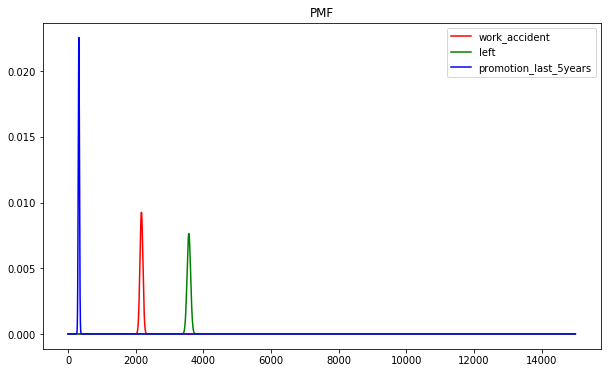

In [87]:
# Plot b_pmf
plt.figure(figsize=(10,6))

plt.plot(b_pmf['work_accident'], 'r', label='work_accident')
plt.plot(b_pmf['left'], 'g', label='left')
plt.plot(b_pmf['promotion_last_5years'], 'b', label='promotion_last_5years')

plt.legend()

plt.title('PMF')
plt.show()

In [89]:
# Now for cdf
c_cdf = {}

for x in p.to_dict():
    y = []
    for i in range(N):
        my_binom = stats.binom(n=N, p=p[x])
        y.append(my_binom.cdf(i))
        
    c_cdf[x] = y

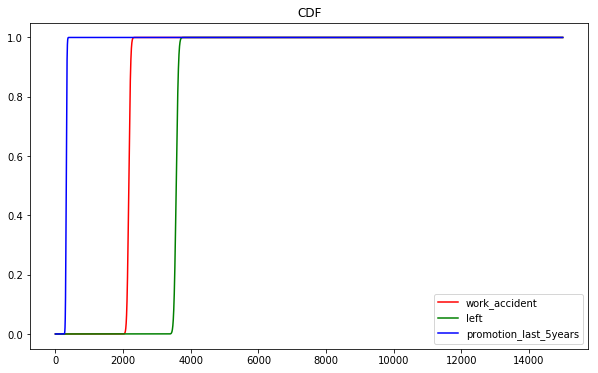

In [90]:
plt.figure(figsize=(10,6))

plt.plot(c_cdf['work_accident'], 'r', label='work_accident')
plt.plot(c_cdf['left'], 'g', label='left')
plt.plot(c_cdf['promotion_last_5years'], 'b', label='promotion_last_5years')

plt.title('CDF')
plt.legend()

plt.show()

In [91]:
# Look at expected values
p * N

work_accident            2169.0
left                     3571.0
promotion_last_5years     319.0
dtype: float64

### The Normal Distribution
The Normal distribution (or sometimes called the Bell Curve or Gaussian) is by far the most prevalent and useful distribution in any field that utilizes statistical techniques.  In fact, in can be shown that the means of random variables sampled repeatedly from **any** distribution eventually form a normal given a sufficiently large sample size.

A normal distribution is characterized by the PDF given by
$$p(x|\mu,\sigma) = \frac{1}{\sqrt{(2\pi\sigma^2)}}e^{-\frac{(x - \mu)^2}{2\sigma^2}} $$

where $\mu$ is the mean and $\sigma^2$ is the variance, thus the distribution is characterized by mean and variance alone.  In this exercise, you'll examine some of the variables in the HR dataset and construct some normal distributions approximating them.

Using the HR data, answer the following

1. Which variables may be approximately normal?
2. For the variables in part 1, plot some histograms.
3. Compute the mean and variance for each of the variables used in parts 1 and 2.
4. Using the mean and variance in part 3, construct normal distributions for each and overlay them on top of the histograms you made in part one.  Are they well approximated by normals?

In [92]:
# Question 1

It looks like `satisfaction_level`, `last_evaluation`, and `average_monthly_hours` are the ones we want to take a look at.  Both `time_spent_company` and `number_projects` could both be too but well treat those as discrete.

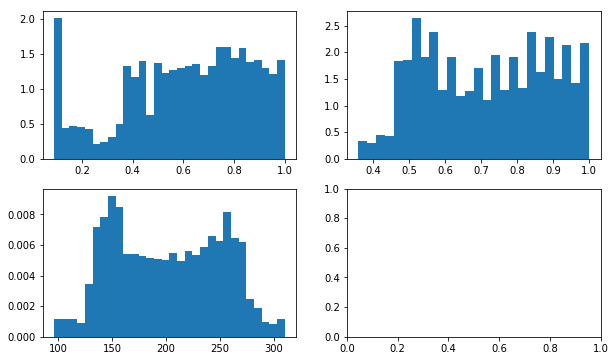

In [99]:
# Question 2
# Initialize a set of subplots
f, axarr = plt.subplots(2, 2, figsize=(10, 6))

# Each subplot has a coordinate in axarr
# Plot a hist for each variable at each of three of the four subplots
axarr[0,0].hist(data.satisfaction_level, normed=True, bins='auto')
axarr[0,1].hist(data.last_evaluation, normed=True, bins='auto')
axarr[1,0].hist(data.average_monthly_hours, normed=True, bins='auto')

plt.show()

In [102]:
means = data[['satisfaction_level', 'last_evaluation', 'average_monthly_hours']].mean()
var = data[['satisfaction_level', 'last_evaluation', 'average_monthly_hours']].var()
print(means)
print(var)

satisfaction_level         0.612834
last_evaluation            0.716102
average_monthly_hours    201.050337
dtype: float64
satisfaction_level          0.061817
last_evaluation             0.029299
average_monthly_hours    2494.313175
dtype: float64


In [104]:
# Get stds as well
stds = data[['satisfaction_level', 'last_evaluation', 'average_monthly_hours']].std()

normals = {}

x = {}

for col in data[['satisfaction_level', 'last_evaluation', 'average_monthly_hours']]:
    normals[col] = stats.norm(loc=means[col], scale=stds[col])
    
    x[col] = np.linspace(normals[col].ppf(0.01),
                         normals[col].ppf(0.99),
                         100)

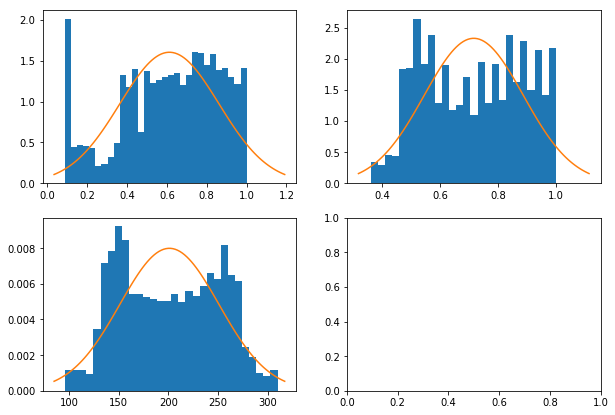

In [106]:
# Plot the hists from before, but include normal curve on top of each
f, axarr = plt.subplots(2, 2, figsize=(10,7))

axarr[0,0].hist(data.satisfaction_level, bins='auto', normed=True)
axarr[0,0].plot(x['satisfaction_level'], normals['satisfaction_level'].pdf(x['satisfaction_level']))

axarr[0,1].hist(data.last_evaluation, bins='auto', normed=True)
axarr[0,1].plot(x['last_evaluation'], normals['last_evaluation'].pdf(x['last_evaluation']))

axarr[1,0].hist(data.average_monthly_hours, bins='auto', normed=True)
axarr[1,0].plot(x['average_monthly_hours'], normals['average_monthly_hours'].pdf(x['average_monthly_hours']))

plt.show()

### The Poisson Distribution
The Poisson distribution is very versatile but is typically used to model counts per unit time or space, such as the number of ad clicks or arriving flights, each per unit time. It has a PDF given by
$$ P(X = x, \lambda) = \frac{\lambda^x e^{-\lambda}}{x!} $$
where the mean and variance are both equal to $\lambda$

Using the HR data, answer the following.

1. What variables would be good candidates for modeling with a Poisson distribution?
2. For each variable in part 1, divide each by salary and fit a Poisson distribution to each.
3. For each salary level, compute the probability of obtaining at least the mean of each variable &mdash; regardless of salary level &mdash; by using the Poisson distributions you constructed in part 2.  Comment on your results.

**Question 1**

Both `number_project` and `time_spend_company` are good to be modeled with Poisson dist

In [111]:
# Question 2
# Get specific dataframe
poisson_df = data[['number_project', 'time_spend_company', 'salary']]
sal_cats = data.salary.unique()

dist_dict = {}

for col in ('number_project', 'time_spend_company'):
    cat_sub = {}
    for cat in sal_cats:
        lam = data[data.salary == cat][col].mean()
        cat_sub[cat] = stats.poisson(mu=lam)
        print(col, cat, lam, cat_sub[cat].mean())
    dist_dict[col] = cat_sub

number_project low 3.799890650628759 3.799890650628759
number_project medium 3.8135277691591685 3.8135277691591685
number_project high 3.767178658043654 3.767178658043654
time_spend_company low 3.4382176052487696 3.4382176052487696
time_spend_company medium 3.52901023890785 3.52901023890785
time_spend_company high 3.692805173807599 3.692805173807599


In [114]:
# Question 3
probs = {}

for col in ('number_project', 'time_spend_company'):
    col_mean = data[col].mean()
    cat_sub = {}
    for cat in sal_cats:
        cat_sub[cat] = dist_dict[col][cat].sf(col_mean)
    probs[col] = cat_sub
    

In [115]:
probs

{'number_project': {'high': 0.5197772989110967,
  'low': 0.526492784895537,
  'medium': 0.5292788234607604},
 'time_spend_company': {'high': 0.5043440311168106,
  'low': 0.4499786914651107,
  'medium': 0.4696141528359114}}

### The Central Limit Theorem
The Central Limit Theorem is perhaps one of the most remarkable results in statistics and mathematics in general.  In short, it says that the distribution of means of independent random variables, sampled from **any** distribution, tends to approach a normal distribution as the sample size increases.

An example of this would be taking a pair of dice, rolling them, and recording the mean of each result.  The Central Limit Theorem states, that after enough rolls, the distribution of the means will be approximately normal.  Stated formally, the result is
    $$ \bar{X_n} \sim N(\mu, \sigma^2/n) = \frac{\sqrt{n}}{\sigma \sqrt{2\pi}}e^{-n(\bar{X_n} - \mu)^2/\sigma^2}$$
In this exercise, you'll conduct some simulation experiments to explore this idea.

Using the HR data, answer the following.
1. Choose two variables which may be good candidates to test this theorem.
2. Using the variables chosen in part 1, randomly select a set of `n = 10` samples and take the mean.  Repeat this 1000 times for each variable.
3. Plot a histogram for each variable used in part 2.  Comment on your results.
4. Repeat parts 2-3 for `n = 100`, `n = 500`, and `n = 1000`.  Comment on your results.
5. Overlay an normal curve on your `n = 1000` plots, using the mean and variance computed from the data.  Comment on your results.

In [116]:
# Question 1
# Pick the two variables of interest and construct a dataframe
clt_df = data[['satisfaction_level', 'number_project']]

In [119]:
# Question 2
sample_means_satisfaction = [clt_df.satisfaction_level.sample(10).mean() for _ in range(1000)]
sample_means_project = [clt_df.number_project.sample(10).mean() for _ in range(1000)]

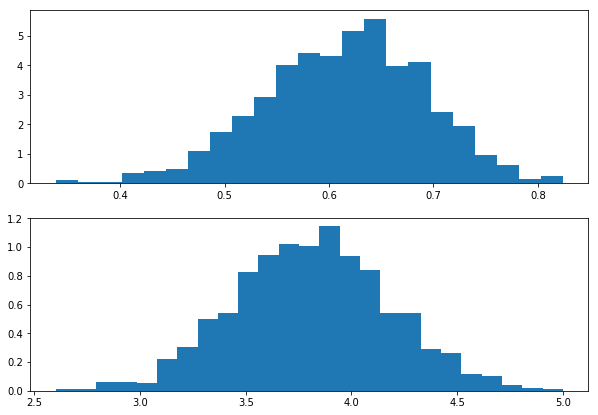

In [125]:
# # Question 3
#Plot histograms of data
fig, ax = plt.subplots(2, figsize=(10,7))

ax[0].hist(sample_means_satisfaction, bins='auto', normed=True)
ax[1].hist(sample_means_project, bins='auto', normed=True)

plt.show()


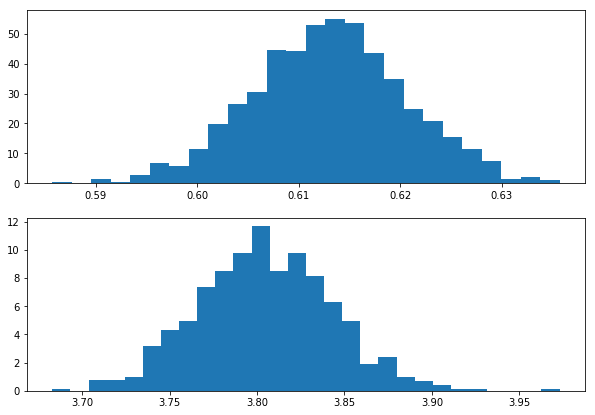

In [127]:
# Question 4
sample_means_satisfaction = [clt_df.satisfaction_level.sample(1000).mean() for _ in range(1000)]
sample_means_project = [clt_df.number_project.sample(1000).mean() for _ in range(1000)]

#Plot histograms of data
fig, ax = plt.subplots(2, figsize=(10,7))

ax[0].hist(sample_means_satisfaction, bins='auto', normed=True)
ax[1].hist(sample_means_project, bins='auto', normed=True)

plt.show()

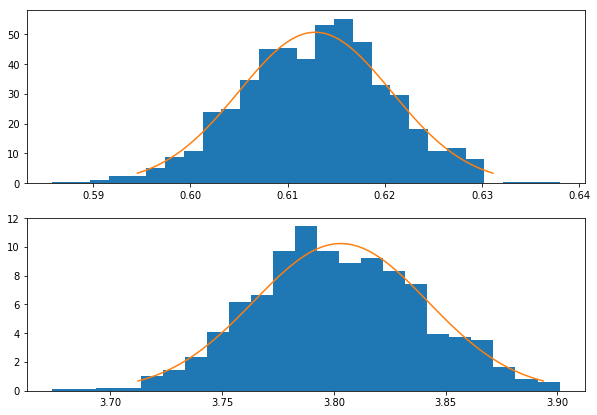

In [129]:
# Question 5
# Get normal dists based on mean, std for each variable
means = clt_df.mean()
stds = clt_df.std()

normals = {}
x = {}

for col in clt_df.columns:
    normals[col] = stats.norm(loc=means[col], scale=stds[col]/np.sqrt(1000))
    x[col] = np.linspace(normals[col].ppf(0.01),
                         normals[col].ppf(0.99),
                         100)


sample_means_satisfaction = [clt_df.satisfaction_level.sample(1000).mean() for _ in range(1000)]
sample_means_project = [clt_df.number_project.sample(1000).mean() for _ in range(1000)]

#Plot histograms of data
fig, ax = plt.subplots(2, figsize=(10,7))

ax[0].hist(sample_means_satisfaction, bins='auto', normed=True)
ax[0].plot(x['satisfaction_level'], normals['satisfaction_level'].pdf(x['satisfaction_level']))

ax[1].hist(sample_means_project, bins='auto', normed=True)
ax[1].plot(x['number_project'], normals['number_project'].pdf(x['number_project']))

plt.show()

## Hypothesis Testing
Hypothesis testing is essentially using the data to answer questions of interest.  For example, does a new medication provide any benefit over placebo?  Or is a subset of the population disproportionately more susceptible to a particular disease?  Or is the difference between two companies profits' significant or due to chance alone?

Before doing some hypothesis testing on the HR data, recall that hypothesis typically come in pairs of the form $H_0$, called the null hypothesis, versus $H_a$, called the alternative hypothesis.  The null hypothesis represents the "default" assumption -- that a medication has no effect for example, while the alternative hypothesis represents what exactly we are looking to discover, in the medication case, whether it provides a significant benefit.  Another common case is testing the difference between two means.  Here, the null hypothesis is that there is no difference between two population means, whereas the alternative hypothesis is that there is a difference.  Stated more precisely
$$H_0: \mu_1 - \mu_2 = 0$$
$$H_a: \mu_1 - \mu_2 \ne 0$$

Hypotheses are usually tested by constructing a confidence interval around the test statistic and selecting a "cut-off" significance level denoted $\alpha$.  A typical $\alpha$ significance is 0.05 and is often called a "p-value".  If a test produces a p-value of $\alpha$ or below, then the null hypothesis can be rejected, strengthening the case of the alternative hypothesis.  It is very important to remember that hypothesis testing can only tell you if your hypothesis is statistically significant -- this does **not** mean that your result may be scientifically significant which requires much more evidence.

In this exercise you'll explore the HR data more and test some hypothesis.

Using the HR data, answer the following.

1. Compute a confidence interval for satisfaction levels, at the 95% confidence level, of employees who left the company and those who didn't.  Do this using both a t distribution and a normal.  Comment on your results.
2. Use a t-test to test the hypothesis that employees who left the company, had lower satisfaction levels than those who did not.  If significant, is the mean difference?  Comment on your results.  (Hint: Do the two populations have equal variance?)
3. Fit a normal curve to each group in part 2 and put them on the same plot next to each other.  Comment on your results.
4. Test the hypothesis that the satisfaction level between each salary group, denoted k, differs signicantly from the mean.  Namely
    - $H_0: \mu - \mu_k = 0$
    - $H_a: \mu - \mu_k \ne 0$
5. How would you interpret your results in part 5?
6. Generate plots for part 5 as you did in part 3.  What conclusions can you draw from the plot?
7. Repeat parts 4-6 on a hypothesis of your choosing.
8. Recall that Power is the probability of failing to reject the null hypothesis when it is false (thus more power is good).  Compute the power for the hypothesis that the satisfaction level of high paid employees is different than that of medium paid employees using a t distribution.

In [131]:
# Question 1
import statsmodels.stats.api as sm

# Compute confidence intervals using t-dist for satisfaction level for both stayed and left
{'stayed': sm.DescrStatsW(data[data.left == 0].satisfaction_level).tconfint_mean(alpha=0.05),
 'left': sm.DescrStatsW(data[data.left == 1].satisfaction_level).tconfint_mean(alpha=0.05)}

/Users/Frank/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


{'left': (0.4314384713317101, 0.44875755219111313),
 'stayed': (0.6628287359038344, 0.6707904450552143)}

In [132]:
# Compute confidence interevales using normal dist for the same
{'stayed': sm.DescrStatsW(data[data.left == 0].satisfaction_level).zconfint_mean(alpha=0.05),
 'left': sm.DescrStatsW(data[data.left == 1].satisfaction_level).zconfint_mean(alpha=0.05)}

{'left': (0.43144140722566204, 0.4487546162971612),
 'stayed': (0.6628291575610661, 0.6707900233979827)}

In [134]:
# Question 2
# Perform two-sided t-test for the two samples (left, stayed)
stats.ttest_ind(data[data.left == 0].satisfaction_level,
                data[data.left == 1].satisfaction_level,
                equal_var=False)

Ttest_indResult(statistic=46.63641435277572, pvalue=0.0)

In [135]:
data[data.left == 0].satisfaction_level.mean() - data[data.left == 1].satisfaction_level.mean()

0.22671157871810688

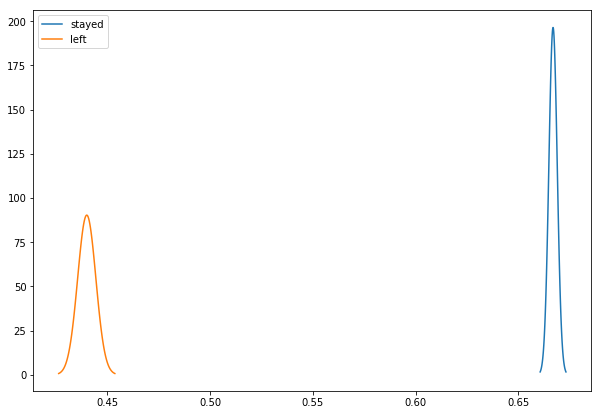

In [138]:
# Question 3
# Get mean, std in dict for each group
means = {'stayed': data[data.left == 0].satisfaction_level.mean(),
         'left': data[data.left == 1].satisfaction_level.mean()}
stds = {'stayed': data[data.left == 0].satisfaction_level.std() / np.sqrt(len(data[data.left == 0])),
         'left': data[data.left == 1].satisfaction_level.std() / np.sqrt(len(data[data.left == 1]))}

# Initialize dicts to hold normal dists and x space
normals = {}
x = {}

# Iterate over each group and fit a normal dist based on mean, std, then calculate x space
for dec in ('stayed', 'left'):
    normals[dec] = stats.norm(loc=means[dec], scale=stds[dec])
    x[dec] = np.linspace(normals[dec].ppf(0.001),
                         normals[dec].ppf(0.999),
                         100)
    
# Plot each on same chart
plt.figure(figsize=(10,7))

plt.plot(x['stayed'], normals['stayed'].pdf(x['stayed']), label='stayed')
plt.plot(x['left'], normals['left'].pdf(x['left']), label='left')

plt.legend()
plt.show()

In [143]:
# Question 4
# Get sample means for satisfactory level for each salary group
mean_satisfaction = data.satisfaction_level.mean()

t_group = {}

for group in data.salary.unique():
    t_group[group] = stats.ttest_1samp(data[data.salary == group].satisfaction_level, mean_satisfaction)
    
t_group

{'high': Ttest_1sampResult(statistic=3.82059975018617, pvalue=0.00013974368695866474),
 'low': Ttest_1sampResult(statistic=-4.058538121602221, pvalue=4.9895149767038095e-05),
 'medium': Ttest_1sampResult(statistic=2.9429521364929117, pvalue=0.0032625787024487714)}

In [145]:
# Question 5
# Means for all groups differ significantly from the mean of the overall group, 
# as seen through the low p-values for each test.

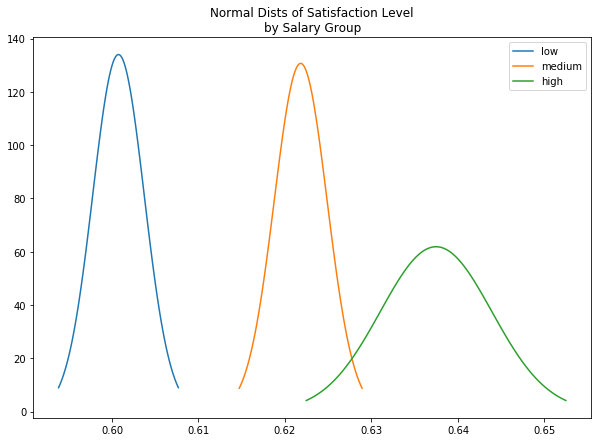

In [148]:
# Question 6
means = {'low': data[data.salary == 'low'].satisfaction_level.mean(),
         'medium': data[data.salary == 'medium'].satisfaction_level.mean(),
         'high': data[data.salary == 'high'].satisfaction_level.mean()}

stds = {'low': data[data.salary == 'low'].satisfaction_level.std() / np.sqrt(len(data[data.salary == 'low'])),
        'medium': data[data.salary == 'medium'].satisfaction_level.std() / np.sqrt(len(data[data.salary == 'medium'])),
        'high': data[data.salary == 'high'].satisfaction_level.std() / np.sqrt(len(data[data.salary == 'high']))}

normals = {}
x = {}

for salary in means.keys():
    normals[salary] = stats.norm(loc=means[salary], scale=stds[salary])
    x[salary] = np.linspace(normals[salary].ppf(0.01),
                            normals[salary].ppf(0.99),
                            100)
    
# Plot
plt.figure(figsize=(10,7))

plt.plot(x['low'], normals['low'].pdf(x['low']), label='low')
plt.plot(x['medium'], normals['medium'].pdf(x['medium']), label='medium')
plt.plot(x['high'], normals['high'].pdf(x['high']), label='high')

plt.title('Normal Dists of Satisfaction Level\nby Salary Group')
plt.legend()

plt.show()

In [152]:
# Question 8
# Compute the high-medium effect size (difference of means)
effect_size = (data[data.salary == 'high'].satisfaction_level.mean() -
               data[data.salary == 'medium'].satisfaction_level.mean())

# Divide by std
effect_size = effect_size / data.satisfaction_level.std()

# Compute the high/medium count ratio
r = len(data[data.salary == 'high']) / len(data[data.salary == 'medium'])

# Use statsmodels api to compute the power using the desired alpha
sm.TTestIndPower().power(effect_size, len(data[data.left == 0]), alpha=0.05, ratio = r)

0.7704654392194535

## Bootstrapping
Bootstrapping is an immensely useful technique in practice.  Very often you may find yourself in a situation where you want to compute some statistic, but lack sufficient data to do so.  Bootstrapping works as a remedy to this problem.

Recall that the bootstrapping algorithm breaks down as follows:
1. Sample n observations with replacement from the observed data resulting in one simulated complete data set. 
1. Take the statistic of the simulated data set
1. Repeat these two steps B times, resulting in B simulated statistics
1. These statistics are approximately drawn from the sampling distribution of the statistic of n observations
    - This is a lot like what you did when drawing many sample means

In this exercise you will implement this algorithm on the HR data.

Write a function that can perform bootrapping for the median of a set of n samples in the HR data set.  Test this function on the `satisfaction_level` with `n = 100` and `b = 100` and compare your results to the true median.  Also compute the standard deviation of the bootstrapped median.

In [155]:
def merge_bstrap(col, n, b):
    ''' Perform bootstrap of the median for a given column of data
    
        col: a column of data
        n: sample size
        b: number of bootstrapped samples
    '''
    # List to store sample medians
    med = []
    # Iterate through b loops
    for _ in range(b):
        # Get a random sample with replacement of size n
        data_temp = col.sample(n=n, replace=True)
        # Compute median of sample
        med_temp = np.median(data_temp)
        # Store sample median in list
        med.append(med_temp)
    return med

In [157]:
test = merge_bstrap(data['satisfaction_level'], 100, 100)
np.mean(test)

0.6438000000000001

In [158]:
np.median(data['satisfaction_level'])

0.64

In [159]:
np.std(test)

0.035784913022110315